# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#Observation 1 : City latitude has direct correlation with Temperature (as expected) but actually no correlation with Humidity. 
#this finding is based all the randomly selected data, regardless or northern or southern hemisphere.
#no correlation between city latitude and cloudiness & wind speed. 
#However most cities have moderate / lower wind speed.

In [55]:
#Observation 2: There is a very strong correlation between the northern / southern hemisphere and the max temperature
#this already been proven in the 1st observation. The nearer to the equater, the warmer it is, the higher the max temperature can go. 
#Northern hemisphere - positive correlation with the max temperature ; Southern hemisphere - positive correlation with max_temperature.
#There weak positive relationship between Latitude and Cloudiness (as per the cities we selected)
#Apart from that, i see no relationship between City Latitude and Humidity & Wind Speed

In [56]:
#Observation 3: Most cities are having higher in humidity regardless of the distance from the equator


In [2]:
#Dependencies
import numpy as np
import pandas as pd
import requests
from scipy.stats import linregress
import time
import json
import matplotlib.pyplot as plt
from sklearn import datasets
from pprint import pprint


#Import API key
from api_keys import weather_api_key
from api_keys import g_key


In [3]:
#import the citipy module
from citipy import citipy

#define the latitude and longitude range
lat_range = (-90,90)
lng_range = (-180,180)

#


## Generate Cities List

In [4]:
#create empty list to hold the info of cities with lat and lng details
lat_lng = []
cities = []

#generate a random lat and lng info using random.uniform function
lat = np.random.uniform(lat_range[0],lat_range[1], size = 1500)
lng = np.random.uniform(lng_range[0],lng_range[1], size = 1500)
target_cord=zip(lat,lng)

In [ ]:
lat

#what's the difference between list and array?*

In [ ]:
list(lng)

In [5]:
#Identify the nearest city for each lat and lng combination using the citipy
for value in target_cord:
    city = citipy.nearest_city(value[0],value[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
        
#check if the dataset is enough for 500 cities
len(cities)

618

In [6]:
#CITIES is a list
cities

['hilo',
 'tasiilaq',
 'mataura',
 'chuy',
 'lucapa',
 'port alfred',
 'chokurdakh',
 'tiruchchendur',
 'vaini',
 'thompson',
 'ostrovnoy',
 'inirida',
 'avesta',
 'howard springs',
 'chitral',
 'villaviciosa',
 'goundam',
 'alofi',
 'saskylakh',
 'rikitea',
 'tumannyy',
 'songea',
 'zhigansk',
 'belushya guba',
 'bluff',
 'kiruna',
 'punta arenas',
 'nago',
 'sentyabrskiy',
 'severo-kurilsk',
 'baykit',
 'mar del plata',
 'palmer',
 'attawapiskat',
 'budogoshch',
 'ushuaia',
 'torbay',
 'cape town',
 'isangel',
 'butaritari',
 'lagoa',
 'puerto ayora',
 'tezu',
 'saint-denis',
 'tuktoyaktuk',
 'srednekolymsk',
 'archidona',
 'busselton',
 'honningsvag',
 'lolua',
 'kuche',
 'dingle',
 'puerto escondido',
 'kruisfontein',
 'nantucket',
 'ilulissat',
 'arlit',
 'farafangana',
 'karasjok',
 'topchikha',
 'albany',
 'sao gabriel da cachoeira',
 'yellowknife',
 'pevek',
 'buala',
 'taolanaro',
 'grindavik',
 'khatanga',
 'nouadhibou',
 'lompoc',
 'bereda',
 'kaitangata',
 'mehamn',
 'anzoa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#We are comparing on Farenheit
units="imperial"

#save config information ; in Farenheit Units
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

#Create an empty list to hold all the data
city_name=[]
city_lat=[]
city_lng=[]
city_temp=[]
city_maxtemp=[]
city_humidity=[]
city_cloudiness=[]
city_windspeed=[]
city_country=[]
date=[]


In [8]:
#trial one data to access the data in the nested list
city="buriti alegre"
query_url=url+city
city_response=requests.get(query_url).json()
pprint(city_response)

{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': -18.14, 'lon': -49.0403},
 'dt': 1631786703,
 'id': 3468745,
 'main': {'feels_like': 72.37,
          'grnd_level': 930,
          'humidity': 31,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 73.83,
          'temp_max': 73.83,
          'temp_min': 73.83},
 'name': 'Buriti Alegre',
 'sys': {'country': 'BR', 'sunrise': 1631783451, 'sunset': 1631826675},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 76, 'gust': 6.4, 'speed': 4.7}}


In [9]:
#trial data 
print(f'Name {city_response["name"]}')
print(f'Humidity {city_response["main"]["humidity"]}')
print(f'Lattitude {city_response["coord"]["lat"]}')
print(f'Longitude {city_response["coord"]["lon"]}')
print(f'Pressure {city_response["main"]["pressure"]}')
print(f'Max Temperature {city_response["main"]["temp_max"]}')
print(f'Cloudiness {city_response["clouds"]["all"]}')
print(f'Country {city_response["sys"]["country"]}')
print(f'Wind Speed {city_response["wind"]["speed"]}')
print(f'Date {city_response["dt"]}')

Name Buriti Alegre
Humidity 31
Lattitude -18.14
Longitude -49.0403
Pressure 1017
Max Temperature 73.83
Cloudiness 9
Country BR
Wind Speed 4.7
Date 1631786703


In [10]:
#Printing data
print("Retrieving data of each city")
print("----------------------------")
count_index= 1
count_set = 1

#create a for loop the list of cities and perform a request for data on each city
for city in cities:
    query_url=url+city
    city_response=requests.get(query_url).json()

    #retrieving the data into a list using exception handling, skip if there's any missing info
    try:
        print(f"Display record {count_index} of the set {count_set}  | City {city}")
        city_name.append(city_response["name"])
        city_lat.append(city_response["coord"]["lat"])
        city_lng.append(city_response["coord"]["lon"])
        city_temp.append(city_response["main"]["temp"])
        city_maxtemp.append(city_response["main"]["temp_max"])
        city_humidity.append(city_response["main"]["humidity"])
        city_cloudiness.append(city_response["clouds"]["all"])
        city_windspeed.append(city_response["wind"]["speed"])
        city_country.append(city_response["sys"]["country"])
        date.append(city_response["dt"])
        
#         city_name=[]
#         city_lat=[]
#         city_lng=[]
#         city_temp=[]
#         city_maxtemp=[]
#         city_humidity=[]
#         city_cloudiness=[]
#         city_windspeed=[]
#         city_country=[]
#         date=[]

        count_index+=1
        
        #seperate the data in 50 records in each set
        if count_index>50:
            #Keep track of the set count
            count_set+=1
            
            #reset the index count in each set, starting for record 1 again in next set
            count_index = 1
            
            #delay the execution because API only allows not making 60 API calls per minute
            time.sleep(1)
        #
        
    except (KeyError, IndexError):
        print(f"Data for the city {city} is not Found. Skipping...")
        count_index += 1
    
print("----------------------------")
print("End of Data Retrieval")
print("----------------------------")

Retrieving data of each city
----------------------------
Display record 1 of the set 1  | City hilo
Display record 2 of the set 1  | City tasiilaq
Display record 3 of the set 1  | City mataura
Display record 4 of the set 1  | City chuy
Display record 5 of the set 1  | City lucapa
Display record 6 of the set 1  | City port alfred
Display record 7 of the set 1  | City chokurdakh
Display record 8 of the set 1  | City tiruchchendur
Display record 9 of the set 1  | City vaini
Display record 10 of the set 1  | City thompson
Display record 11 of the set 1  | City ostrovnoy
Display record 12 of the set 1  | City inirida
Display record 13 of the set 1  | City avesta
Display record 14 of the set 1  | City howard springs
Display record 15 of the set 1  | City chitral
Display record 16 of the set 1  | City villaviciosa
Display record 17 of the set 1  | City goundam
Display record 18 of the set 1  | City alofi
Display record 19 of the set 1  | City saskylakh
Display record 20 of the set 1  | City 

Display record 51 of the set 3  | City tibiri
Display record 1 of the set 4  | City ancud
Display record 2 of the set 4  | City balikpapan
Display record 3 of the set 4  | City ponta do sol
Display record 4 of the set 4  | City adwa
Display record 5 of the set 4  | City souillac
Display record 6 of the set 4  | City vila franca do campo
Display record 7 of the set 4  | City lasa
Display record 8 of the set 4  | City barrow
Display record 9 of the set 4  | City tsihombe
Data for the city tsihombe is not Found. Skipping...
Display record 10 of the set 4  | City daru
Display record 11 of the set 4  | City cabo san lucas
Display record 12 of the set 4  | City dikson
Display record 13 of the set 4  | City vardo
Display record 14 of the set 4  | City de-kastri
Display record 15 of the set 4  | City genhe
Display record 16 of the set 4  | City santiago de cao
Display record 17 of the set 4  | City conde
Display record 18 of the set 4  | City dudinka
Display record 19 of the set 4  | City beth

Display record 2 of the set 7  | City ponta pora
Display record 3 of the set 7  | City placido de castro
Display record 4 of the set 7  | City amderma
Data for the city amderma is not Found. Skipping...
Display record 5 of the set 7  | City kidal
Display record 6 of the set 7  | City lianzhou
Display record 7 of the set 7  | City atikokan
Display record 8 of the set 7  | City lorengau
Display record 9 of the set 7  | City cockburn town
Display record 10 of the set 7  | City terney
Display record 11 of the set 7  | City labuhan
Display record 12 of the set 7  | City molina
Display record 13 of the set 7  | City aklavik
Display record 14 of the set 7  | City nome
Display record 15 of the set 7  | City ningan
Data for the city ningan is not Found. Skipping...
Display record 16 of the set 7  | City touros
Display record 17 of the set 7  | City sao filipe
Display record 18 of the set 7  | City andenes
Display record 19 of the set 7  | City kefamenanu
Display record 20 of the set 7  | City p

Display record 6 of the set 10  | City batouri
Display record 7 of the set 10  | City margate
Display record 8 of the set 10  | City yambio
Display record 9 of the set 10  | City locri
Display record 10 of the set 10  | City malakal
Display record 11 of the set 10  | City greenville
Display record 12 of the set 10  | City ulaangom
Display record 13 of the set 10  | City tukrah
Display record 14 of the set 10  | City faranah
Display record 15 of the set 10  | City saint anthony
Display record 16 of the set 10  | City tarut
Display record 17 of the set 10  | City yumen
Display record 18 of the set 10  | City fort saint john
Data for the city fort saint john is not Found. Skipping...
Display record 19 of the set 10  | City ouesso
Display record 20 of the set 10  | City aflu
Data for the city aflu is not Found. Skipping...
Display record 21 of the set 10  | City aldan
Display record 22 of the set 10  | City imeni zhelyabova
Display record 23 of the set 10  | City laguna
Display record 24 o

Display record 9 of the set 13  | City kyaukse
Display record 10 of the set 13  | City homer
Display record 11 of the set 13  | City kasempa
Display record 12 of the set 13  | City hamilton
Display record 13 of the set 13  | City prince rupert
Display record 14 of the set 13  | City santa rosa
Display record 15 of the set 13  | City ketchikan
----------------------------
End of Data Retrieval
----------------------------


In [ ]:
#         city_name=[]
#         city_lat=[]
#         city_lng=[]
#         city_temp=[]
#         city_maxtemp=[]
#         city_humidity=[]
#         city_cloudiness=[]
#         city_windspeed=[]
#         city_country=[]
#         date=[]

# 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#create a dataframe to put all the information that I appended in the lists.
cities_info_df = pd.DataFrame({"City":city_name,
                              "Latitude":city_lat,
                              "Longitude":city_lng,
                              "Temperature (F)":city_temp,
                              "Maximum Temperature (F)":city_maxtemp,
                               "Humidity":city_humidity,
                               "Cloudiness":city_cloudiness,
                               "Wind Speed":city_windspeed,
                               "Country":city_country,
                               "Data":date
                              })

#DISPLAY the dataframe
cities_info_df

,City,Latitude,Longitude,Temperature (F),Maximum Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Data
0,Hilo,19.7297,-155.0900,73.69,79.29,94,90,4.61,US,1631786705
1,Tasiilaq,65.6145,-37.6368,37.56,37.56,80,96,6.06,GL,1631786707
2,Mataura,-46.1927,168.8643,39.47,39.47,91,54,2.77,NZ,1631786709
3,Chui,-33.6971,-53.4616,46.56,46.56,83,0,6.51,UY,1631786709
4,Lucapa,-8.4192,20.7447,86.04,86.04,40,93,5.39,AO,1631786711
...,...,...,...,...,...,...,...,...,...,...
552,Kasempa,-13.4584,25.8338,95.20,95.20,14,63,4.88,ZM,1631787360
553,Hamilton,39.1834,-84.5333,62.58,67.05,95,90,4.61,US,1631787362
554,Prince Rupert,54.3161,-130.3201,50.29,53.29,93,90,4.61,CA,1631787363
555,Santa Rosa,14.3122,121.1114,82.94,84.11,78,99,5.59,PH,1631787077


In [12]:
#checking the size of the dataset to ensure there's sufficient no. of cities in the record for analysis later
cities_info_df.shape

(557, 10)

In [13]:
#save the data into a csv file
cities_info_df.to_csv("Output/cities.csv",index = False, header = True)

In [14]:
cities_info_df["Humidity"]

0      94
1      80
2      91
3      83
4      40
       ..
552    14
553    95
554    93
555    78
556    88
Name: Humidity, Length: 557, dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#using LOC to display the cities that had the humidity result that is more than 100 
filtered_cities_df = cities_info_df.loc[(cities_info_df["Humidity"]>100),:]
filtered_cities_df
list(filtered_cities_df.index)

[]

In [16]:
list(cities_info_df.index.values[[50,60,79]])

[50, 60, 79]

In [17]:
#another checking to see if there's no data in humidity >100
humidity_test = cities_info_df.loc[(cities_info_df["Humidity"]>100)]

#check if there's no data at all in this list 
if len(humidity_test) == 0:
    print("There is no related city that has humidity value > 100%")
    print("Will using original dataframe to proceed to next step analysis")
else:
    #  Get the indices of cities that have humidity over 100%.
    index_list =list(humidity_test.index.values)
    clean_city_df = cities_info_df.drop(index=index_list)
    clean_city_df.reset_index(drop = True)

There is no related city that has humidity value > 100%
Will using original dataframe to proceed to next step analysis


In [53]:
#max humidity
max_humidity = cities_info_df["Humidity"].max()
max_humidity

100

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [19]:
###there are no city that has humidity over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [20]:
cities_info_df.head()

,City,Latitude,Longitude,Temperature (F),Maximum Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Data
0,Hilo,19.7297,-155.0900,73.69,79.29,94,90,4.61,US,1631786705
1,Tasiilaq,65.6145,-37.6368,37.56,37.56,80,96,6.06,GL,1631786707
2,Mataura,-46.1927,168.8643,39.47,39.47,91,54,2.77,NZ,1631786709
3,Chui,-33.6971,-53.4616,46.56,46.56,83,0,6.51,UY,1631786709
4,Lucapa,-8.4192,20.7447,86.04,86.04,40,93,5.39,AO,1631786711


## Latitude vs. Temperature Plot

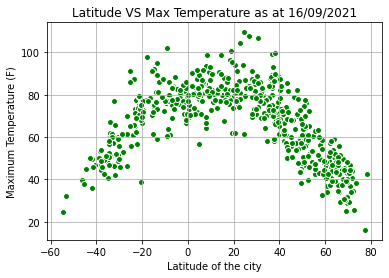

In [21]:
#create a scatter plot Temperature vs Latitude
plt.scatter(cities_info_df["Latitude"],cities_info_df["Maximum Temperature (F)"], facecolors = "green", marker = "o", edgecolor = "white")
#clb=plt.colorbar()
#adding labels, title, limits
plt.title("Latitude VS Max Temperature as at 16/09/2021")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude of the city")

#---show the plot and save the image
plt.grid(True)
plt.savefig("Output/LatitudeVSTemp_scatter.png")
plt.show()

In [22]:
#TEMPERATURE (F) vs Latitude

#Initial hypothesis : the nearer to equator, the warmer the city is
#Conclusion : Based on the randomly chosen data and the plot, the nearer to the equator (around 0), the higher is the temperature
#             it proves that hypothesis is correct. 

## Latitude vs. Humidity Plot

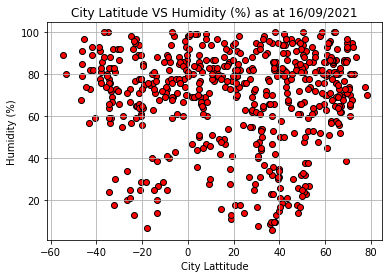

In [23]:
#Create a scatter plot Latitude vs Humidity
plt.scatter(cities_info_df["Latitude"],cities_info_df["Humidity"], facecolors = "red", marker = "o", edgecolor = "black")
#clb=plt.colorbar()
#adding labels, title, limits
plt.title("City Latitude VS Humidity (%) as at 16/09/2021")
plt.ylabel("Humidity (%)")
plt.xlabel("City Lattitude")

#---show the plot and save the image
plt.grid(True)
plt.savefig("Output/LatitudeVSHumidity_scatter.png")
plt.show()

In [24]:
#HUMIDITY (%) vs LATITUDE

#Initial hypothesis : the nearer to equator, the more humid the city is
#Conclusion : Based on the randomly chosen data and the plot, it seems like there's not much correlation between the latitude and the humidity of the city
#The plots are not consistent therefore we can't observe any pattern


## Latitude vs. Cloudiness Plot

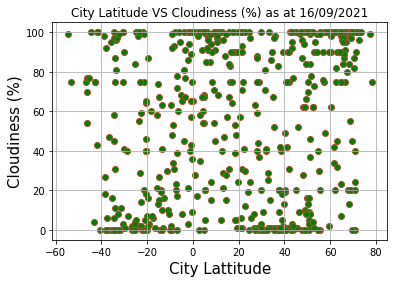

In [25]:
#create a scatter plot LATITUDE vs CLOUDINESS
plt.scatter(cities_info_df["Latitude"],cities_info_df["Cloudiness"], facecolors = "green", marker = "o", edgecolor = "sienna")
#clb=plt.colorbar()

#adding labels, title, limits
plt.title("City Latitude VS Cloudiness (%) as at 16/09/2021")
plt.ylabel("Cloudiness (%)", fontsize = 15)
plt.xlabel("City Lattitude",fontsize = 15)

#---show the plot and save the image
plt.grid(True)
plt.savefig("Output/LatitudeVSCloudiness_scatter.png")
plt.show()

# CLOUDINESS (%) VS LATITUDE
- The results show no obvious correlation between Latitude and Cloudiness



In [26]:
cities_info_df

,City,Latitude,Longitude,Temperature (F),Maximum Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Data
0,Hilo,19.7297,-155.0900,73.69,79.29,94,90,4.61,US,1631786705
1,Tasiilaq,65.6145,-37.6368,37.56,37.56,80,96,6.06,GL,1631786707
2,Mataura,-46.1927,168.8643,39.47,39.47,91,54,2.77,NZ,1631786709
3,Chui,-33.6971,-53.4616,46.56,46.56,83,0,6.51,UY,1631786709
4,Lucapa,-8.4192,20.7447,86.04,86.04,40,93,5.39,AO,1631786711
...,...,...,...,...,...,...,...,...,...,...
552,Kasempa,-13.4584,25.8338,95.20,95.20,14,63,4.88,ZM,1631787360
553,Hamilton,39.1834,-84.5333,62.58,67.05,95,90,4.61,US,1631787362
554,Prince Rupert,54.3161,-130.3201,50.29,53.29,93,90,4.61,CA,1631787363
555,Santa Rosa,14.3122,121.1114,82.94,84.11,78,99,5.59,PH,1631787077


## Latitude vs. Wind Speed Plot

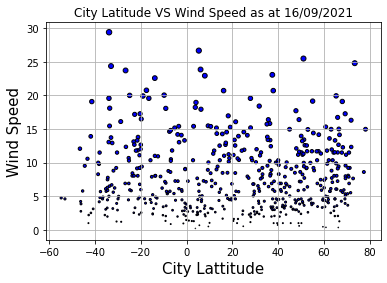

In [27]:
size= cities_info_df["Wind Speed"]

#create a scatter plot LATITUDE vs WIND SPEED
plt.scatter(cities_info_df["Latitude"],cities_info_df["Wind Speed"], facecolors = "blue", marker = "o", edgecolor = "black", s=size)
#clb=plt.colorbar()

#adding labels, title, limits
plt.title("City Latitude VS Wind Speed as at 16/09/2021")
plt.ylabel("Wind Speed", fontsize = 15)
plt.xlabel("City Lattitude", fontsize = 15)

#---show the plot and save the image
plt.grid(True)
plt.savefig("Output/LatitudeVSWindSpeed_scatter.png")
plt.show()

Wind Speed (mph) vs Latitude

## Linear Regression

Creating north and south dataframe

In [28]:
#define north and south hemisphere based on Latitude
#north hemisphere is greater than or equal to 0 degree latitude
north=cities_info_df.loc[cities_info_df["Latitude"].astype(float) >= 0.0, :]
#This is the dataframe for NORTH HEMISPHERE
north = north.reset_index(drop=True)


#define north and south hemisphere based on Latitude
#south hemisphere is less than 0 degree latitude
south=cities_info_df.loc[cities_info_df["Latitude"].astype(float) < 0.0, :]
#This is the dataframe for SOUTH HEMISPHERE
south= south.reset_index(drop=True)


In [29]:
# Extract relevant data for North and South in dataframe for plotting later
north_lat = north["Latitude"]

In [35]:
# Define a function to plot linear regression

def linear_plot(x_values, y_values, x_label, y_label,fig_loc, fig_name):
    fig, ax = plt.subplots(figsize = (8,6))
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y= " + str(round(slope,2)) + "x " + str(round(intercept,2))
    plt.scatter(x_values, y_values, color = "green", edgecolor = "black")
    plt.plot(x_values, regress_values, "r-")
    print(f"The r-squared value is : {rvalue**2}")
    
    #add labels, titles, grid, and other features
    plt.annotate(line_eq, fig_loc , fontsize = 15, color = "red")
    plt.xlabel(x_label, fontsize = 12)
    plt.ylabel(y_label, fontsize = 12)
    plt.grid()
    plt.savefig(f"Output/{fig_name}")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is : 0.6547248842741386


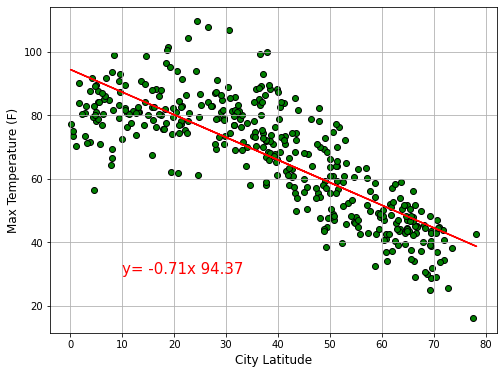

In [36]:
#define the variables that required for Linear regression plotting 
x_label = "City Latitude"
y_label = "Max Temperature (F)"
x_title = "Northern Hemisphere, Max Temperature (F) vs Latitude"
fig_name= "North_MaxTempLat.png"
fig_loc = (10,30)
x_axis = north["Latitude"]
y_axis = north["Maximum Temperature (F)"]
linear_plot(x_axis, y_axis, x_label, y_label,fig_loc,fig_name)

In [37]:
#conclusion: Northern Hemipshere seems to have negative correlative between MAX TEMP and Latitude

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is : 0.6305266071821091


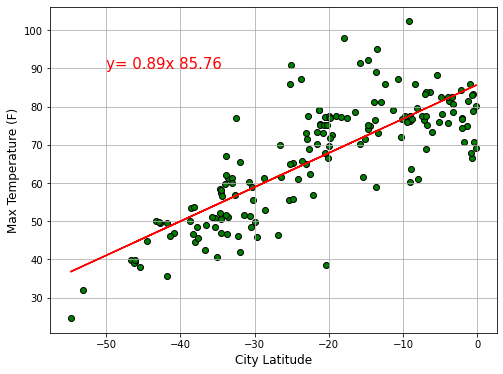

In [38]:
#define the variables that required for Linear regression plotting 
x_label = "City Latitude"
y_label = "Max Temperature (F)"
x_title = "Southern Hemisphere, Max Temperature (F) vs Latitude"
fig_name = "South_LatvsTemp.png"
fig_loc = (-50,90)
x_axis = south["Latitude"]
y_axis = south["Maximum Temperature (F)"]
linear_plot(x_axis, y_axis, x_label, y_label, fig_loc, fig_name)

In [39]:
#conclusion: Southern Hemipshere seems to have positive correlative between MAX TEMP and Latitude

###There is STRONG correlation between Latitude and Max Temp for both NORTH AND SOUTH hemisphere 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is : 0.004845249459946753


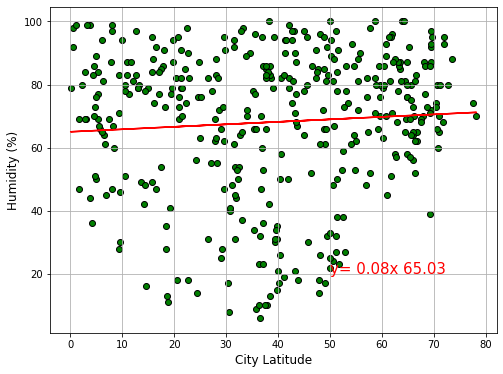

In [40]:
#define the variables that required for Linear regression plotting 
x_label = "City Latitude"
y_label = "Humidity (%)"
x_title = "Northern Hemisphere, Humidity (%) vs Latitude"
fig_name= "North_LatvsHumid.png"
fig_loc = (50,20)
x_axis = north["Latitude"]
y_axis = north["Humidity"]
linear_plot(x_axis, y_axis, x_label, y_label, fig_loc, fig_name)


In [41]:
#conclusion: Based on the linear regression, the line seems almost parallel (just a slight upward)
#it seems weak relationship / no relation between northern hemisphere and the humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is : 0.004845249459946753


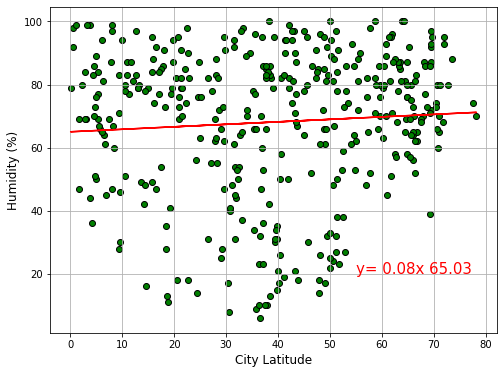

In [43]:
#define the variables that required for Linear regression plotting 
x_label = "City Latitude"
y_label = "Humidity (%)"
x_title = "Southern Hemisphere, Humidity (%) vs Latitude"
fig_name = "South_LatvsHumd.png"
fig_loc = (55,20)
x_axis = north["Latitude"]
y_axis = north["Humidity"]
linear_plot(x_axis, y_axis, x_label, y_label,fig_loc, fig_name)

In [44]:
#conclusion: Based on the linear regression, it seems like not much correlation (the line is parallel).


##### Northern/Southern Hemisphere : Humidity (%) vs. Latitude Linear Regression (conclusion)

#both plotting shows weak (or very little) correlation between the Humidity vs Latitude. 
######## it seems to have similar amount of plotting with high humidity regardless of the latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is : 0.012920058240026478


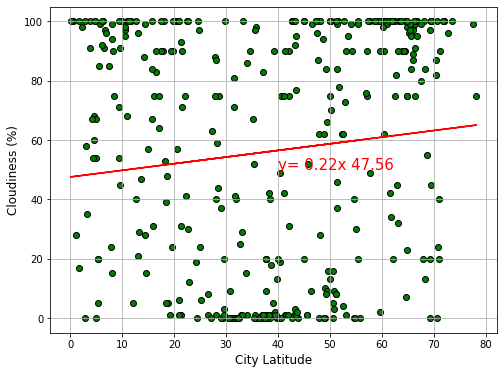

In [45]:
#define the variables that required for Linear regression plotting 
x_label = "City Latitude"
y_label = "Cloudiness (%)"
x_title = "Northern Hemisphere, Cloudiness (%) vs Latitude"
fig_name = "North_LatvsCld.png"
fig_loc=(40,50)
x_axis = north["Latitude"]
y_axis = north["Cloudiness"]
linear_plot(x_axis, y_axis, x_label, y_label,fig_loc, fig_name)


In [46]:
#conclusion : weak positive correlation between the Cloudiness and Latitude for Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is : 0.012920058240026478


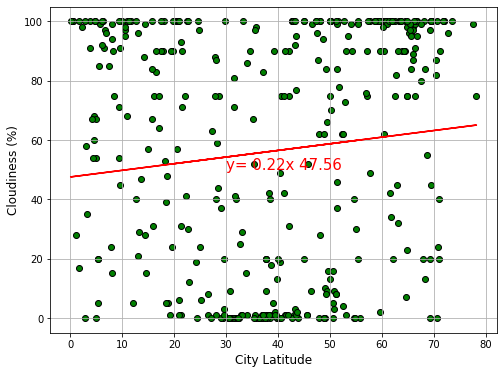

In [47]:
#define the variables that required for Linear regression plotting 
x_label = "City Latitude"
y_label = "Cloudiness (%)"
x_title = "Southern Hemisphere, Cloudiness (%) vs Latitude"
fig_name= "South_LatvsCld.png"
fig_loc=(30,50)
x_axis = north["Latitude"]
y_axis = north["Cloudiness"]
linear_plot(x_axis, y_axis, x_label, y_label,fig_loc, fig_name)


In [48]:
#conclusion : weak positive correlation between the Cloudiness and Latitude for Southern Hemisphere

##### There seems to have weak positive correlation between the CLOUDINESS % and Latitude.
####### The results seem very extreme (each latitude label have either cities with highest / lowest humidity %) 
##### Can't observe any concrete proof to say there's a relationship

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is : 0.004976729185933277


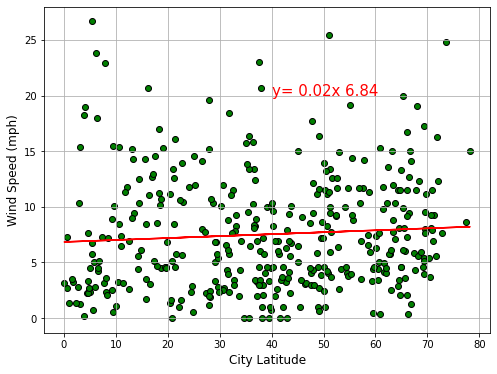

In [49]:
#define the variables that required for Linear regression plotting 
x_label = "City Latitude"
y_label = "Wind Speed (mph)"
x_title = "Northern Hemisphere, Wind Speed (mph) vs Latitude"
fig_name = "North_LatvsWindSpeed.png"
fig_loc=(40,20)
x_axis = north["Latitude"]
y_axis = north["Wind Speed"]
linear_plot(x_axis, y_axis, x_label, y_label,fig_loc, fig_name)

In [50]:
#conclusion : NO correlation between the Wind Speed and Latitude for Northern Hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is : 0.004976729185933277


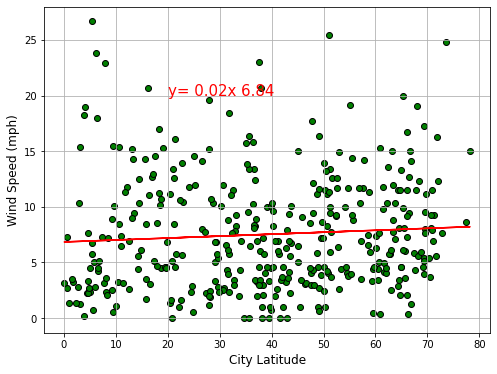

In [51]:
#define the variables that required for Linear regression plotting 
x_label = "City Latitude"
y_label = "Wind Speed (mph)"
x_title = "Southern Hemisphere, Wind Speed (mph) vs Latitude"
fig_name = "South_LatvsWindSpeed.png"
fig_loc = (20,20)
x_axis = north["Latitude"]
y_axis = north["Wind Speed"]
linear_plot(x_axis, y_axis, x_label, y_label,fig_loc, fig_name)

In [ ]:
#conclusion : NO correlation between the Wind Speed and Latitude for Southern Hemisphere

##### Northern/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
##### Both scatter plots show weak correlation (slight positive) of the relationship between Wind Speed and Latitude
##### Most cities have low wind speed 